In [23]:
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
from transformers import TextClassificationPipeline

import tensorflow as tf
import pandas as pd
import json
import gc

from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords


import seaborn as sns
import matplotlib.pyplot as plt
#from plotly.offline import iplot

from tqdm import tqdm

In [24]:
data = "/Users/pratham/Documents/Documents - Pratham’s MacBook Pro/pracfor2025/mfg_project/cyberbullying_detector/data/cyberbullying_tweets.csv"

In [25]:
df = pd.read_csv(data)
df.head(10)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying


In [26]:
import re

df['hashtags'] = df['tweet_text'].apply(lambda x: re.findall(r"#(\w+)", x))
df.head(10)

,tweet_text,cyberbullying_type,hashtags
0,"In other words #katandandre, your food was cra...",not_cyberbullying,"[katandandre, mkr]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,"[aussietv, MKR, theblock, ImACelebrityAU, toda..."
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,[]
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,[]
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,[]
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,[]
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying,[]
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying,[mkr]
8,@stockputout everything but mostly my priest,not_cyberbullying,[]
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying,[]


In [27]:
from ekphrasis.classes.segmenter import Segmenter

seg_tw = Segmenter(corpus="twitter")
def segment_hashtags(hashtags):
    return ' '.join([seg_tw.segment(h) for h in hashtags])

df['segmented_hashtags'] = df['hashtags'].apply(segment_hashtags)


Reading twitter - 1grams ...
Reading twitter - 2grams ...


In [28]:
df.head(10)

,tweet_text,cyberbullying_type,hashtags,segmented_hashtags
0,"In other words #katandandre, your food was cra...",not_cyberbullying,"[katandandre, mkr]",kat and andre mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,"[aussietv, MKR, theblock, ImACelebrityAU, toda...",aussie tv mkr the block im a celebrity au toda...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,[],
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,[],
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,[],
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,[],
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying,[],
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying,[mkr],mkr
8,@stockputout everything but mostly my priest,not_cyberbullying,[],
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying,[],


In [ ]:
import preprocessor as p

p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.HASHTAG)
emoji_pattern = re.compile(
    "[\U0001F600-\U0001F64F"
    "\U0001F300-\U0001F5FF"
    "\U0001F680-\U0001F6FF"
    "\U0001F1E0-\U0001F1FF"
    "\U00002700-\U000027BF"
    "\U0001F900-\U0001F9FF"
    "\U00002600-\U000026FF"
    "\U0001FA70-\U0001FAFF]+", flags=re.UNICODE
)

def clean_tweet(text):
    text = p.clean(text)                 
    text = emoji_pattern.sub('', text)   
    text = re.sub(r'\d+', '', text)      
    text = text.lower()                  
    return text.strip()

df['clean_text'] = df['tweet_text'].apply(clean_tweet)


In [30]:
df.head(10)

,tweet_text,cyberbullying_type,hashtags,segmented_hashtags,clean_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,"[katandandre, mkr]",kat and andre mkr,"in other words , your food was crapilicious!"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,"[aussietv, MKR, theblock, ImACelebrityAU, toda...",aussie tv mkr the block im a celebrity au toda...,why is so white?
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,[],,a classy whore? or more red velvet cupcakes?
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,[],,"meh. :p thanks for the heads up, but not too c..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,[],,this is an isis account pretending to be a kur...
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,[],,"yes, the test of god is that good or bad or in..."
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying,[],,itu sekolah ya bukan tempat bully! ga jauh kay...
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying,[mkr],mkr,karma. i hope it bites kat on the butt. she is...
8,@stockputout everything but mostly my priest,not_cyberbullying,[],,everything but mostly my priest
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying,[],,rebecca black drops out of school due to bully...


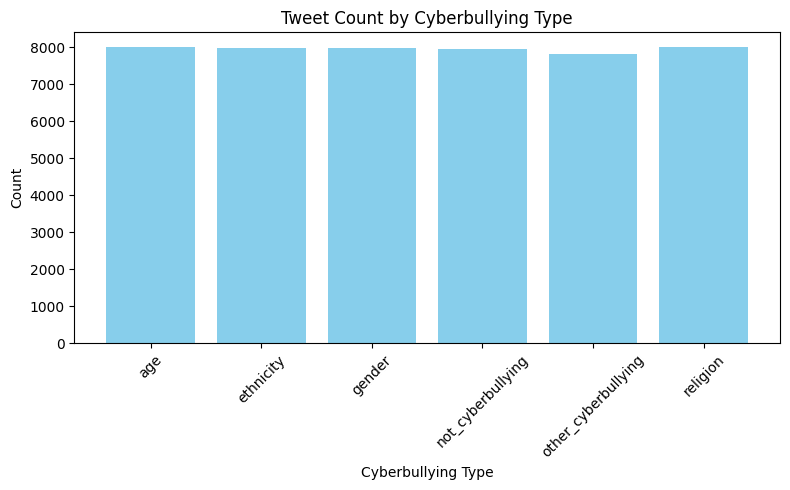

In [ ]:
count= df.groupby('cyberbullying_type').size().reset_index(name='count')

plt.figure(figsize=(8, 5))
plt.bar(count['cyberbullying_type'], count['count'], color='skyblue')


plt.title('Tweet Count by Cyberbullying Type')
plt.xlabel('Cyberbullying Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
train_df, temp_df = train_test_split(
    df,
    test_size=0.3,
    stratify=df['cyberbullying_type'],
    random_state=42
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df['cyberbullying_type'],
    random_state=42
)

In [35]:

from transformers import DistilBertTokenizerFast

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
token_lengths = df['clean_text'].apply(lambda x: len(tokenizer.tokenize(x)))
token_lengths.describe()


Token indices sequence length is longer than the specified maximum sequence length for this model (879 > 512). Running this sequence through the model will result in indexing errors


count    47692.000000
mean        30.203451
std         20.056844
min          0.000000
25%         16.000000
50%         26.000000
75%         41.000000
max        992.000000
Name: clean_text, dtype: float64

In [39]:
from transformers import DistilBertTokenizerFast


#tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
#tokenized = tokenizer(
#    df['clean_text'].tolist(),
#    padding=True,            
#    truncation=True,         
#    max_length=64,           
#    return_tensors='pt'      
#)

train_encodings = tokenizer(
    train_df['clean_text'].tolist(),
    truncation=True,
    padding=True,
    max_length=64,
    return_tensors='pt'
)

val_encodings = tokenizer(
    val_df['clean_text'].tolist(),
    truncation=True,
    padding=True,
    max_length=64,
    return_tensors='pt'
)

test_encodings = tokenizer(
    test_df['clean_text'].tolist(),
    truncation=True,
    padding=True,
    max_length=64,
    return_tensors='pt'
)



In [41]:
print("Train class distribution:\n", train_df['cyberbullying_type'].value_counts(normalize=True))
print("Val class distribution:\n", val_df['cyberbullying_type'].value_counts(normalize=True))
print("Test class distribution:\n", test_df['cyberbullying_type'].value_counts(normalize=True))


Train class distribution:
 cyberbullying_type
religion               0.167715
age                    0.167565
gender                 0.167176
ethnicity              0.166936
not_cyberbullying      0.166577
other_cyberbullying    0.164031
Name: proportion, dtype: float64
Val class distribution:
 cyberbullying_type
religion               0.167738
age                    0.167599
gender                 0.167179
ethnicity              0.166900
not_cyberbullying      0.166620
other_cyberbullying    0.163964
Name: proportion, dtype: float64
Test class distribution:
 cyberbullying_type
age                    0.167599
religion               0.167599
gender                 0.167179
ethnicity              0.166900
not_cyberbullying      0.166620
other_cyberbullying    0.164104
Name: proportion, dtype: float64


In [ ]:
train_input_ids = train_encodings['input_ids']
train_attention_mask = train_encodings['attention_mask']

val_input_ids = val_encodings['input_ids']
val_attention_mask = val_encodings['attention_mask']

test_input_ids = test_encodings['input_ids']
test_attention_mask = test_encodings['attention_mask']


In [43]:
import torch
from torch.utils.data import Dataset

class CyberbullyingDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        return {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx],
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

    def __len__(self):
        return len(self.labels)


In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_labels_encoded = le.fit_transform(train_df['cyberbullying_type'])
val_labels_encoded = le.transform(val_df['cyberbullying_type'])
test_labels_encoded = le.transform(test_df['cyberbullying_type'])

In [ ]:
from torch.utils.data import DataLoader


train_dataset = CyberbullyingDataset(train_encodings, train_labels_encoded)
val_dataset = CyberbullyingDataset(val_encodings, val_labels_encoded)
test_dataset = CyberbullyingDataset(test_encodings, test_labels_encoded)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)


In [ ]:
from transformers import DistilBertForSequenceClassification

model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=6
)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.optim import AdamW
from torch.optim.lr_scheduler import StepLR

optimizer = AdamW(model.parameters(), lr=5e-5)
scheduler = StepLR(optimizer, step_size=2, gamma=0.9)


In [ ]:
import torch
from tqdm import tqdm
from sklearn.metrics import classification_report, accuracy_score

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model.to(device)
best_accuracy = 0
epochs = 8
model.train()

for epoch in range(epochs):
    total_loss = 0
    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    scheduler.step()
    print(f"Epoch {epoch + 1}/{epochs} - Training loss: {total_loss:.4f}")

    # Validation
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in tqdm(val_loader, desc=f"Validating Epoch {epoch+1}"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, axis=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"Validation Accuracy: {acc:.4f}")
    print(classification_report(all_labels, all_preds, target_names=le.classes_))

    if acc > best_accuracy:
        best_accuracy = acc
        torch.save(model.state_dict(), "best_model.pt")
        print(f" Best model saved at epoch {epoch+1} with accuracy {acc:.4f}")


Validating Epoch 1:   1%|          | 2/224 [00:00<00:15, 14.15it/s]

Epoch 1/8 - Training loss: 186.9575


Validating Epoch 1: 100%|██████████| 224/224 [00:15<00:00, 14.80it/s]


Validation Accuracy: 0.8244
                     precision    recall  f1-score   support

                age       0.98      0.98      0.98      1199
          ethnicity       0.99      0.97      0.98      1194
             gender       0.89      0.84      0.86      1196
  not_cyberbullying       0.62      0.48      0.54      1192
other_cyberbullying       0.55      0.74      0.63      1173
           religion       0.98      0.94      0.96      1200

           accuracy                           0.82      7154
          macro avg       0.83      0.82      0.82      7154
       weighted avg       0.83      0.82      0.83      7154



  0%|          | 1/2087 [00:00<04:49,  7.21it/s]

🔸 Best model saved at epoch 1 with accuracy 0.8244


Validating Epoch 2:   1%|          | 2/224 [00:00<00:15, 14.44it/s]

Epoch 2/8 - Training loss: 146.4311


Validating Epoch 2: 100%|██████████| 224/224 [00:15<00:00, 14.77it/s]


Validation Accuracy: 0.8246
                     precision    recall  f1-score   support

                age       0.98      0.98      0.98      1199
          ethnicity       0.99      0.98      0.98      1194
             gender       0.90      0.83      0.86      1196
  not_cyberbullying       0.60      0.54      0.57      1192
other_cyberbullying       0.56      0.69      0.62      1173
           religion       0.97      0.94      0.95      1200

           accuracy                           0.82      7154
          macro avg       0.83      0.82      0.83      7154
       weighted avg       0.83      0.82      0.83      7154



  0%|          | 1/2087 [00:00<04:43,  7.35it/s]

🔸 Best model saved at epoch 2 with accuracy 0.8246


Validating Epoch 3:   1%|          | 2/224 [00:00<00:15, 14.05it/s]

Epoch 3/8 - Training loss: 131.2040


Validating Epoch 3: 100%|██████████| 224/224 [00:15<00:00, 14.79it/s]


Validation Accuracy: 0.8269
                     precision    recall  f1-score   support

                age       0.98      0.98      0.98      1199
          ethnicity       0.98      0.98      0.98      1194
             gender       0.84      0.87      0.86      1196
  not_cyberbullying       0.57      0.60      0.59      1192
other_cyberbullying       0.62      0.56      0.59      1173
           religion       0.96      0.96      0.96      1200

           accuracy                           0.83      7154
          macro avg       0.83      0.83      0.83      7154
       weighted avg       0.83      0.83      0.83      7154



  0%|          | 1/2087 [00:00<04:45,  7.30it/s]

🔸 Best model saved at epoch 3 with accuracy 0.8269


Validating Epoch 4:   1%|          | 2/224 [00:00<00:16, 13.76it/s]

Epoch 4/8 - Training loss: 129.4100


  0%|          | 1/2087 [00:00<04:37,  7.51it/s]

Validation Accuracy: 0.8229
                     precision    recall  f1-score   support

                age       0.98      0.97      0.98      1199
          ethnicity       0.99      0.97      0.98      1194
             gender       0.86      0.86      0.86      1196
  not_cyberbullying       0.58      0.54      0.56      1192
other_cyberbullying       0.57      0.64      0.60      1173
           religion       0.97      0.95      0.96      1200

           accuracy                           0.82      7154
          macro avg       0.82      0.82      0.82      7154
       weighted avg       0.83      0.82      0.82      7154



Validating Epoch 5:   1%|          | 2/224 [00:00<00:15, 14.28it/s]

Epoch 5/8 - Training loss: 121.4757


  0%|          | 1/2087 [00:00<04:39,  7.46it/s]

Validation Accuracy: 0.8239
                     precision    recall  f1-score   support

                age       0.98      0.98      0.98      1199
          ethnicity       0.98      0.98      0.98      1194
             gender       0.83      0.87      0.85      1196
  not_cyberbullying       0.61      0.51      0.56      1192
other_cyberbullying       0.59      0.63      0.61      1173
           religion       0.94      0.97      0.96      1200

           accuracy                           0.82      7154
          macro avg       0.82      0.82      0.82      7154
       weighted avg       0.82      0.82      0.82      7154



Validating Epoch 6:   1%|          | 2/224 [00:00<00:15, 14.18it/s]

Epoch 6/8 - Training loss: 114.1621


  0%|          | 1/2087 [00:00<04:54,  7.07it/s]

Validation Accuracy: 0.8180
                     precision    recall  f1-score   support

                age       0.99      0.97      0.98      1199
          ethnicity       0.99      0.98      0.98      1194
             gender       0.84      0.87      0.85      1196
  not_cyberbullying       0.54      0.63      0.58      1192
other_cyberbullying       0.60      0.51      0.55      1173
           religion       0.97      0.94      0.96      1200

           accuracy                           0.82      7154
          macro avg       0.82      0.82      0.82      7154
       weighted avg       0.82      0.82      0.82      7154



Validating Epoch 7:   1%|          | 2/224 [00:00<00:15, 14.22it/s]

Epoch 7/8 - Training loss: 111.3611


  0%|          | 1/2087 [00:00<04:37,  7.52it/s]

Validation Accuracy: 0.7979
                     precision    recall  f1-score   support

                age       0.97      0.98      0.98      1199
          ethnicity       0.98      0.98      0.98      1194
             gender       0.80      0.88      0.84      1196
  not_cyberbullying       0.50      0.58      0.54      1192
other_cyberbullying       0.55      0.40      0.46      1173
           religion       0.96      0.96      0.96      1200

           accuracy                           0.80      7154
          macro avg       0.79      0.80      0.79      7154
       weighted avg       0.79      0.80      0.79      7154



Validating Epoch 8:   1%|          | 2/224 [00:00<00:15, 14.37it/s]

Epoch 8/8 - Training loss: 109.6181


Validating Epoch 8: 100%|██████████| 224/224 [00:15<00:00, 14.81it/s]

Validation Accuracy: 0.8114
                     precision    recall  f1-score   support

                age       0.98      0.98      0.98      1199
          ethnicity       0.98      0.98      0.98      1194
             gender       0.89      0.84      0.86      1196
  not_cyberbullying       0.52      0.60      0.56      1192
other_cyberbullying       0.55      0.51      0.53      1173
           religion       0.96      0.96      0.96      1200

           accuracy                           0.81      7154
          macro avg       0.81      0.81      0.81      7154
       weighted avg       0.82      0.81      0.81      7154



In [55]:
def test_model(model, test_loader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Testing"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, axis=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"\n Final Test Accuracy: {acc:.4f}")
    print(classification_report(all_labels, all_preds, target_names=le.classes_))


In [ ]:
model.load_state_dict(torch.load("best_model.pt"))
model.to(device)
model.eval()

test_model(model, test_loader)  


Testing: 100%|██████████| 224/224 [00:15<00:00, 14.75it/s]


 Final Test Accuracy: 0.8228
                     precision    recall  f1-score   support

                age       0.98      0.98      0.98      1199
          ethnicity       0.98      0.99      0.99      1194
             gender       0.84      0.89      0.87      1196
  not_cyberbullying       0.56      0.56      0.56      1192
other_cyberbullying       0.59      0.56      0.58      1174
           religion       0.96      0.95      0.95      1199

           accuracy                           0.82      7154
          macro avg       0.82      0.82      0.82      7154
       weighted avg       0.82      0.82      0.82      7154



## Pulling real time tweets to classify the tweets Real Time

In [ ]:
import tweepy
import pandas as pd
from config import BEARER_TOKEN  


client = tweepy.Client(bearer_token=BEARER_TOKEN)

search_query = "racial -is:retweet -is:reply -has:links lang:en"  


response = client.search_recent_tweets(
    query=search_query,
    max_results=10,
    tweet_fields=["created_at", "public_metrics", "source", "text"]
)


tweets_data = []
for tweet in response.data:
    tweets_data.append([
        tweet.created_at,
        tweet.public_metrics.get("like_count", 0),
        tweet.source if hasattr(tweet, "source") else "N/A",
        tweet.text
    ])


df = pd.DataFrame(tweets_data, columns=["Date Created", "Number of Likes", "Source", "Tweet"])
print(df)


               Date Created  Number of Likes Source  \
0 2025-05-04 21:23:07+00:00                0   None   
1 2025-05-04 21:20:10+00:00                0   None   
2 2025-05-04 21:14:49+00:00                1   None   
3 2025-05-04 21:14:28+00:00                0   None   
4 2025-05-04 21:14:02+00:00                1   None   
5 2025-05-04 21:10:26+00:00                0   None   
6 2025-05-04 21:08:10+00:00                0   None   
7 2025-05-04 21:06:25+00:00                4   None   
8 2025-05-04 21:03:58+00:00                0   None   
9 2025-05-04 21:02:50+00:00                0   None   

                                               Tweet  
0  MAGA feels threatened by cultural and racial d...  
1  Stop hacking my feed and saying I’m talking to...  
2  Never expected to have to clarify this, but bo...  
3  The entire point of this website is to drive r...  
4  I started a GiveSendGo in hopes of going back ...  
5  Islam’s Stance on equality 🧵 \n\n1/ Islam teac...  
6  Vacava

In [67]:
df.to_csv("fetched_tweets.csv", index=False, encoding='utf-8')


In [ ]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
import torch
import pandas as pd
from torch.nn.functional import softmax

tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=6)
model.load_state_dict(torch.load("best_model.pt", map_location=torch.device('cpu')))
model.eval()


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:

df = pd.read_csv("fetched_tweets.csv")
texts = df["Tweet"].astype(str).tolist()

encodings = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

with torch.no_grad():
    outputs = model(input_ids=encodings["input_ids"], attention_mask=encodings["attention_mask"])
    probs = softmax(outputs.logits, dim=1)
    predictions = torch.argmax(probs, dim=1).numpy()


In [ ]:

label_map = {
    0: "age",
    1: "ethnicity",
    2: "gender",
    3: "not_cyberbullying",
    4: "other_cyberbullying",
    5: "religion"
}

df["Prediction"] = predictions
df["Label"] = df["Prediction"].map(label_map)


df.to_csv("classified_tweets.csv", index=False)
print("Tweets classified and saved to 'classified_tweets.csv'")


Tweets classified and saved to 'classified_tweets.csv'


In [ ]:
import pandas as pd
df = pd.read_csv("classified_tweets.csv", encoding='utf-8', quoting=1)
pd.set_option('display.max_colwidth', None)
df.head(10)


,Date Created,Number of Likes,Source,Tweet,Prediction,Label
0,2025-05-04 21:23:07+00:00,0,NaN,MAGA feels threatened by cultural and racial differences - evil when it hurts others for no reason beyond childish misdirected hate. Billionaires ripped the guts out of America with their greed - and will do it again. Not fault of migrants or Muslims - fault of men like those,5,religion
1,2025-05-04 21:20:10+00:00,0,NaN,Stop hacking my feed and saying I’m talking to you ninjas. I dunno anybody and I’m to arms length for comfort for you to know me so please don’t do the uh clout chase thing . If I date in the future it will only be middle eastern and white appearing men or MULTI RACIAL no bi,1,ethnicity
2,2025-05-04 21:14:49+00:00,1,NaN,"Never expected to have to clarify this, but both murder and directing racial slurs at a child are wrong.\nAlso, murder is worse.\nAny conversation thereafter should begin by recognizing those two truths.",0,age
3,2025-05-04 21:14:28+00:00,0,NaN,The entire point of this website is to drive racial hatred it really seems.,1,ethnicity
4,2025-05-04 21:14:02+00:00,1,NaN,"I started a GiveSendGo in hopes of going back to school for IT to provide a better life for my kids, but I didn't call anyone a racial slur or stab anyone so I guess fuck me.",0,age
5,2025-05-04 21:10:26+00:00,0,NaN,"Islam’s Stance on equality 🧵 \n\n1/ Islam teaches that all humanity descends from Adam, uniting us as one family. The Quran (49:13) states: “We made you into nations and tribes to know one another.” Racial distinctions are for recognition, not division. Equality is divine.",5,religion
6,2025-05-04 21:08:10+00:00,0,NaN,Vacava? Civil war? To finally put an end to all this prejudice on both sides of the racial divide?,1,ethnicity
7,2025-05-04 21:06:25+00:00,4,NaN,"Dems be like... we figured out American racial harmony, let me introduce you to a concept and slogan we call ALL LIVES MATTER",1,ethnicity
8,2025-05-04 21:03:58+00:00,0,NaN,"Ultimately, it’s only the Holy Spirit who can bring about society’s transformation. It’s the Spirit who brings unity, breaking down divisions of gender, race &amp; social position. Those indwelt by the Spirit should be fighting for gender, racial &amp; social equality. @nickygumbel⁩",5,religion
9,2025-05-04 21:02:50+00:00,0,NaN,"Enjoying a backyard grilled steak with corn on the cob and a baked potato with the wife of 43 years watching college baseball with no out of control players, at commercial go to golf also no racial drama. With decent politicians it is the golden era.",0,age
